## Observations and Insights 

In [135]:
# The code in this cell is courtesy of the starter code writer.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# importing numpy is my idea
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [136]:

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head(12)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [137]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()


249

In [138]:
#checking dataframe length

len(combined_df)

1893

In [139]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["duplicated"] = combined_df.duplicated(["Mouse ID", "Timepoint"])
combined_df.loc[combined_df["duplicated"] == True, :].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [140]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == "g989", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [141]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Perhaps the wrong Mouse ID was entered? I interpret the instuction
# to ask for all records related to this mouse to be purged.

cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

cleaned_gb = cleaned_df.groupby("Drug Regimen")

summary = cleaned_gb["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [143]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = cleaned_gb["Mouse ID"].nunique()
mouse_count


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

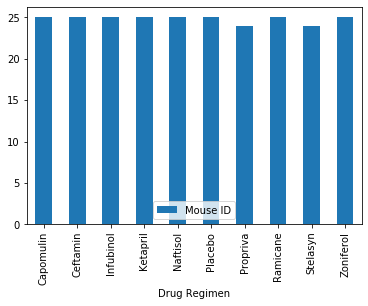

In [144]:
# Using Pandas DataFrame.plot()
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Convert mouse_count from a series to a dataframe.

mouse_count_df = mouse_count.to_frame()

mouse_count_df.plot(kind="bar")


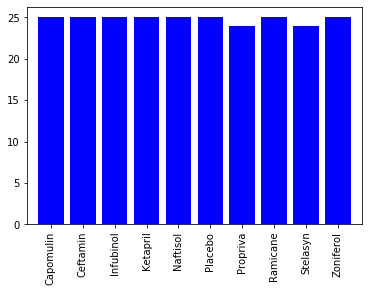

In [145]:
# Using PyPlot
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



# # Create a list indicating where to write x labels and set figure size to adjust for space

x_axis = np.arange(len(mouse_count))

plt.bar(x_axis, mouse_count, color='b', alpha=1, align="center")  # Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")
tick_locations  # Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

plt.show()


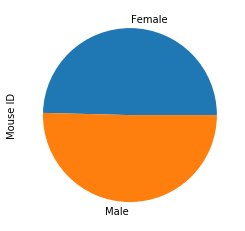

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_gb = cleaned_df.groupby("Sex")
gender_series = gender_gb.nunique()["Mouse ID"]


gender_series.plot.pie()



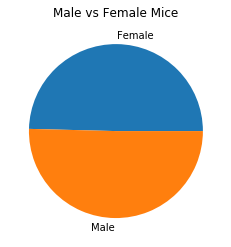

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_series, labels=["Female","Male"], )
plt.title("Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Getting a data frame with Mouse ID and final Tumor Volume.


final_time_df = cleaned_df.groupby("Mouse ID").max()["Timepoint"].rename("final_time").to_frame()
final_time_df

# Merge the final times with the cleaned_df

final_times_merged_df = pd.merge(cleaned_df, final_time_df, on=["Mouse ID", "Mouse ID"])

# Add a boolean column, true if the Timepoint is equal to the final time for that mouse
final_times_merged_df["Last Observation (T/F)"] = final_times_merged_df["Timepoint"] == final_times_merged_df["final_time"]
final_times_merged_df

#Extracting the final volumes for the rows where "Last Observation (T/F)" is True

final_volumes = final_times_merged_df.loc[final_times_merged_df["Last Observation (T/F)"] == True,:]
final_volumes




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated,final_time,Last Observation (T/F)
9,k403,Ramicane,Male,21,16,45,22.050126,1,False,45,True
19,s185,Capomulin,Female,3,17,45,23.343598,1,False,45,True
29,x401,Capomulin,Female,16,15,45,28.484033,0,False,45,True
39,m601,Capomulin,Male,22,17,45,28.430964,1,False,45,True
49,g791,Ramicane,Male,11,16,45,29.128472,1,False,45,True
...,...,...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,False,5,True
1849,z435,Propriva,Female,12,26,10,48.710661,0,False,10,True
1859,z581,Infubinol,Female,24,25,45,62.754451,3,False,45,True
1869,z795,Naftisol,Female,13,29,45,65.741070,3,False,45,True


In [149]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

vol_list = []

# I also want this dictionary to feed to my plotting algorithm below.

treat_volumes = {}


# Creating a list to store analysis of quartiles and outlier bounds
quartile_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for med in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    med_volume = final_volumes.loc[final_volumes["Drug Regimen"] == med, "Tumor Volume (mm3)"]
    
    #Putting the volumes in a list
    vol_list = med_volume.values.tolist()
    
    
    # add subset -- keeping a dictionary of treatments and final tumor volumes.
    treat_volumes.update({med:vol_list})
    

    # Determine outliers using upper and lower bounds
    q1 = med_volume.quantile(.25)
    median_final_volume = med_volume.quantile(.5)
    q3 = med_volume.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    upper_outliers = med_volume[med_volume > upper]
    if upper_outliers.empty:
        upper_outlier_detected = False
    else:
        upper_outlier_detected = True
    
    
    lower_outliers = med_volume[med_volume < lower]
    if lower_outliers.empty:
        lower_outlier_detected = False
    else:
        lower_outlier_detected = True
    
    
    # Keeping results in list of dictionaries. I want to present results in a dataframe eventually.
    dict = {"Treatment": med, 
            "Lower Quartile": q1, 
            "Median": median_final_volume, 
            "Upper Quartile":q3,
            "Interquartile Range": iqr,
            "Possible Outliers are Lower Than": lower,
            "Possible Outliers are Higher Than": upper,
            "Lower Outlier(s) Indicated (T/F)": lower_outlier_detected,
            "Upper Outlier(s) Indicated (T/F)": upper_outlier_detected}
    
    quartile_list.append(dict)
    
quartile_df = pd.DataFrame(quartile_list)
quartile_df = quartile_df.set_index("Treatment")
quartile_df  

                                       
    

,Lower Quartile,Median,Upper Quartile,Interquartile Range,Possible Outliers are Lower Than,Possible Outliers are Higher Than,Lower Outlier(s) Indicated (T/F),Upper Outlier(s) Indicated (T/F)
Treatment,,,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,False,False
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,False,False
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,True,False
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,False,False


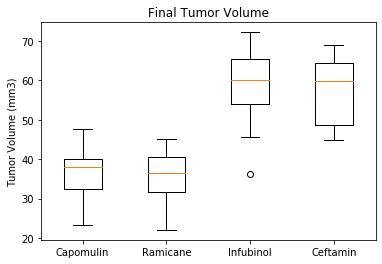

In [150]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# This will make use of the dictionary treat_volumes created above


fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume')
ax.set_ylabel('Tumor Volume (mm3)')

ax.boxplot(treat_volumes.values())
ax.set_xticklabels(treat_volumes.keys())

plt.show()

# The above solution was inspired by the conversation at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary
# Diziet Asahi the answer contributor.

## Line and Scatter Plots

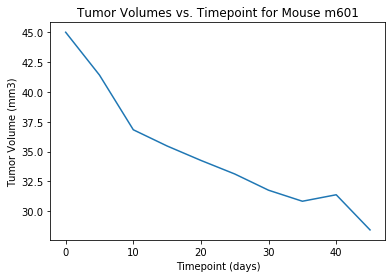

In [151]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Choosing mouse m601

cap_mouse_df = final_times_merged_df.loc[final_times_merged_df["Mouse ID"] == "m601", :][["Timepoint", "Tumor Volume (mm3)"]]

#cap_mouse_df

plt.plot(cap_mouse_df["Timepoint"], cap_mouse_df["Tumor Volume (mm3)"])
plt.title("Tumor Volumes vs. Timepoint for Mouse m601")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

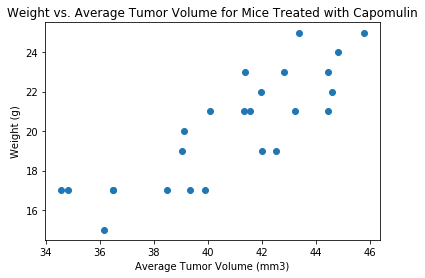

In [152]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# We need to generate the average tumor volume for each mouse in the Capomulin regimen
# Each tumor volume reading is equally weighted.

cap_data = final_times_merged_df.loc[final_times_merged_df["Drug Regimen"] == "Capomulin"][["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"]]
cap_data_gb = cap_data.groupby("Mouse ID")
cap_vol_av = cap_data_gb.mean()

plt.scatter(cap_vol_av["Tumor Volume (mm3)"], cap_vol_av["Weight (g)"])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
plt.show()

## Correlation and Regression

The correlation coefficient is r = 0.8419363424694718.


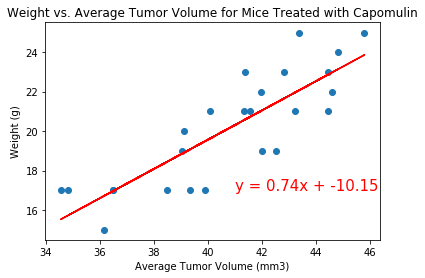

In [153]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# This cell largely inspired by the class activity Ins_Fits_and_Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_vol_av["Tumor Volume (mm3)"], cap_vol_av["Weight (g)"])

regress_values = cap_vol_av["Tumor Volume (mm3)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_vol_av["Tumor Volume (mm3)"], cap_vol_av["Weight (g)"])
plt.plot(cap_vol_av["Tumor Volume (mm3)"],regress_values,"r-")
plt.annotate(line_eq,(41,17),fontsize=15,color="red")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Weight vs. Average Tumor Volume for Mice Treated with Capomulin")

print(f"The correlation coefficient is r = {rvalue}.")

plt.show()
